Target node 99 received message 0


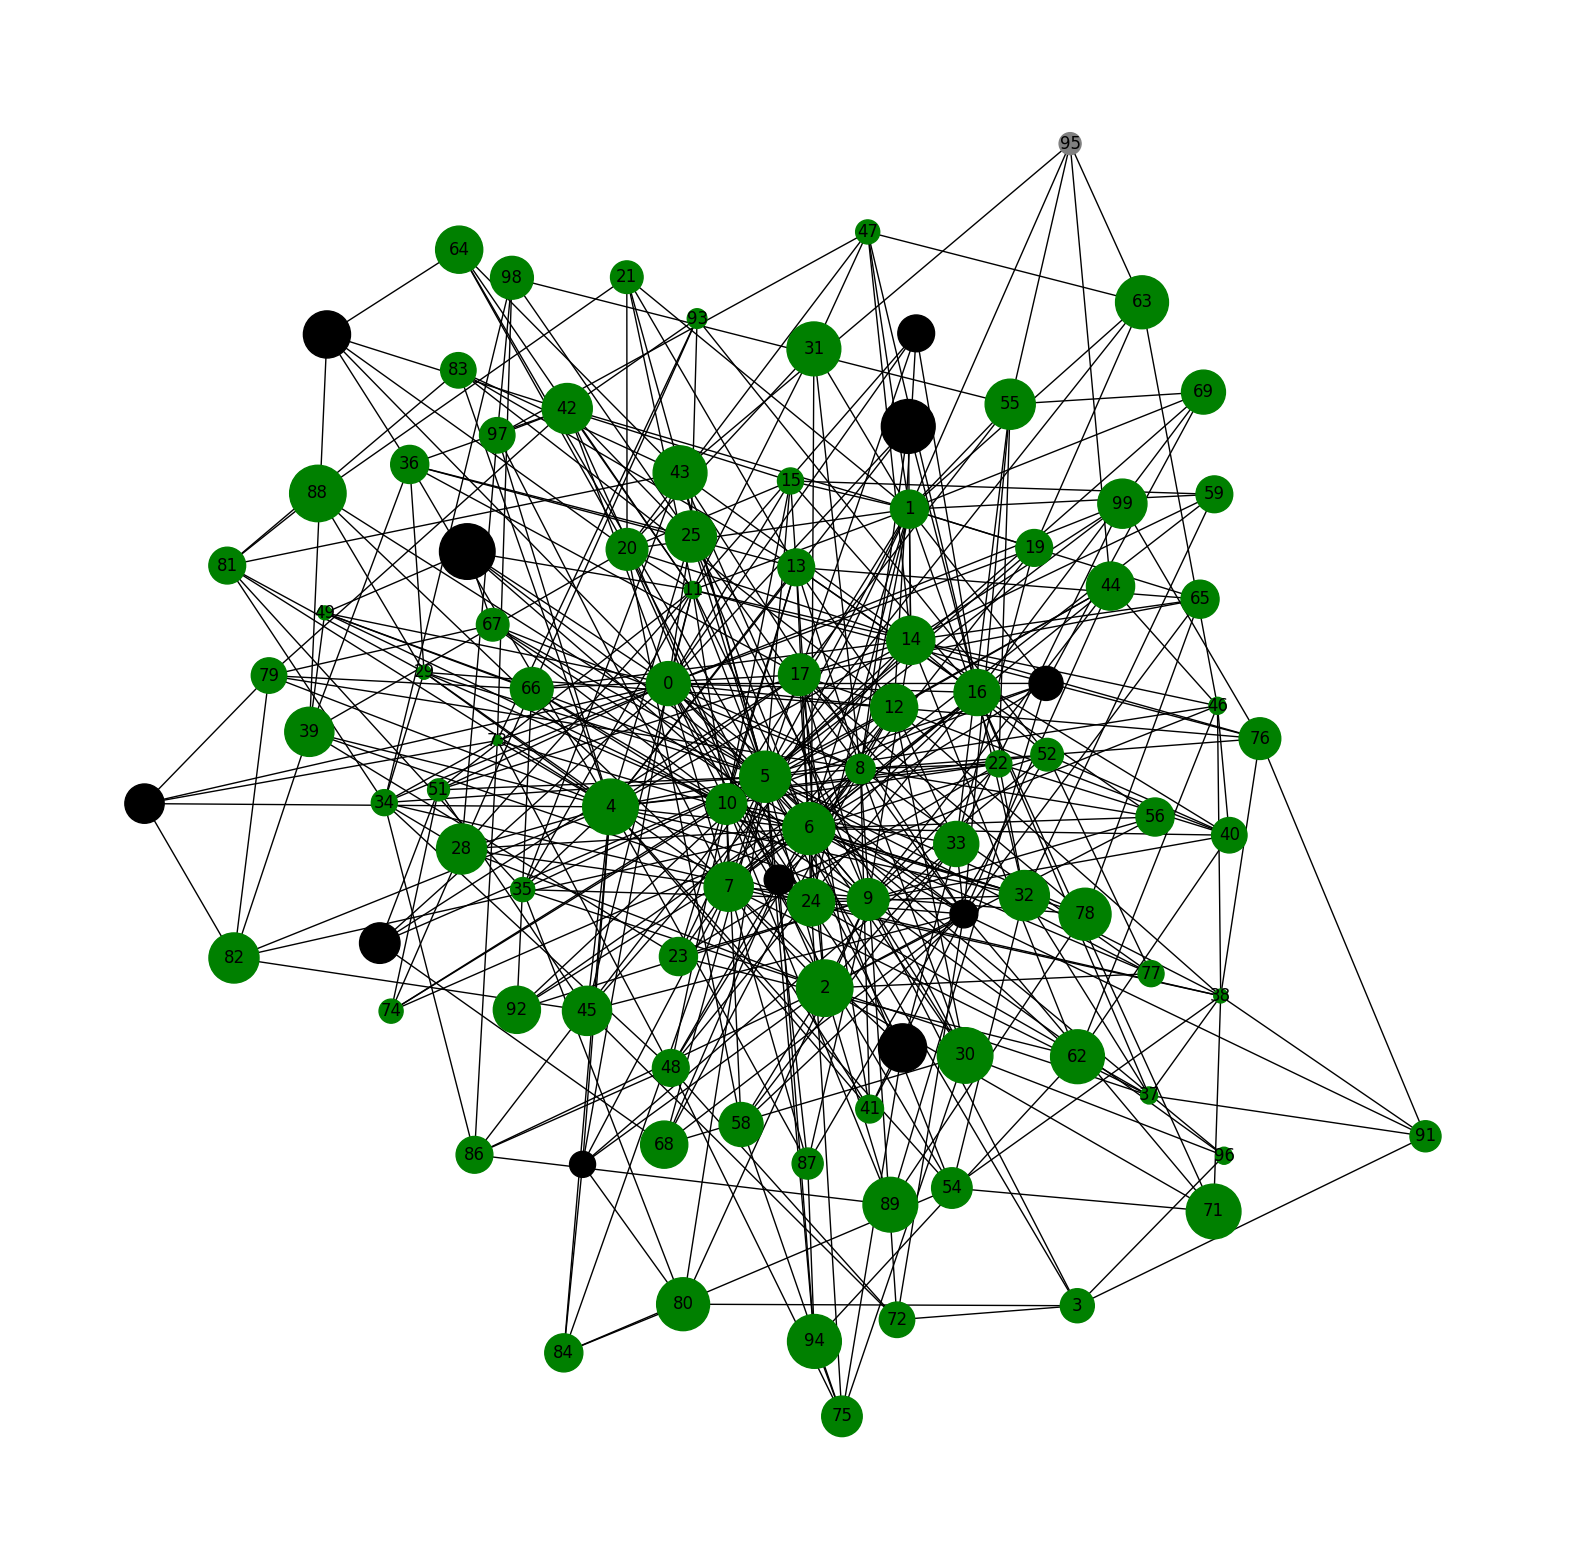

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Set the parameters for the power-law degree distribution
gamma = 3
min_degree = 5
max_degree = 33

# Set the initial decay factor to reduce processing capacity per node, if new msg received
decay_factor = 0.2

# Create a graph with power-law degree distribution
num_nodes = 100
G = nx.powerlaw_cluster_graph(n=num_nodes, m=min_degree, p=1/gamma)
processing_abilities = [random.randint(1, max_degree) for _ in range(num_nodes)]

# Choose a source node and target nodes
source = 0
targets = [num_nodes-1, num_nodes-2]

# Use spring layout to arrange the nodes in the graph
pos = nx.spring_layout(G, seed=42)

# Set the node sizes based on processing ability
node_sizes = [50 * ability for ability in processing_abilities]

# Set the node labels
node_labels = {i: f"{i}" for i in range(num_nodes)}

# Initialize the node colors
node_colors = ['gray' for _ in range(num_nodes)]
node_colors[source] = 'blue'

# Initialize the message queue
message_queue = [(source, 0)]

# Start the message passing process
while message_queue:
    # Get the next message from the queue
    sender, message = message_queue.pop(0)
    
    # Update the processing ability of the sender node based on the decay factor
    processing_abilities[sender] = processing_abilities[sender] * (1 - decay_factor)
    
    # Check if the sender is a target node
    if sender in targets:
        print(f"Target node {sender} received message {message}")
        break
    
    # Iterate over the neighbors of the sender node
    for neighbor in G.neighbors(sender):
        # Calculate the processing ability of the neighbor node based on the decay factor
        neighbor_processing_ability = processing_abilities[neighbor] * (1 - decay_factor)
        
        # Check if the neighbor has enough processing ability to receive the message
        if neighbor_processing_ability >= message:
            # Add the neighbor to the message queue with the remaining message
            message_queue.append((neighbor, message))
            
            # Update the node color to indicate that it has received a message
            node_colors[neighbor] = 'green'
            
            # Update the processing ability of the neighbor node
            processing_abilities[neighbor] = neighbor_processing_ability
            
        else:
            # Update the node color to indicate that it has dropped the message
            node_colors[neighbor] = 'red'
    
    # Update the node color to indicate that the sender has sent a message
    node_colors[sender] = 'black'
    
# Draw the graph
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels=node_labels)
plt.axis('off')
plt.show()
